# F1 Project Sequential Model

1. [Libraries](#1)
2. [Data Preparation](#2)
3. [Visualization](#3)
4. [Model Creating and Model Summary](#4)
5. [Model Training](#5)
6. [Model Testing](#6)
7. [Model Testing on Test Set](#7)
8. [Model Testing on 1 Picture](#8)
9. [Another Model Testing Method](#9)
10. [Model Saving and Loading](#10)
11. [Model Visualization](#11)
12. [Visualizing Hidden Layers](#12)

<a id = '1'></a>
## Libraries

In [1]:
#Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np 
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

<a id = '2'></a>
## Data Preparation

In [2]:
#Directory
baseDir = r'C:\Users\gorke\Desktop\dataf1'

#Data generating
trainDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
testDatagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)

#Flow from directory
trainDatagen = trainDatagen.flow_from_directory(baseDir, target_size = (500, 500), subset = 'training', batch_size = 2)
testDatagen = testDatagen.flow_from_directory(baseDir, target_size = (500, 500), subset = 'validation', batch_size = 2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


<a id = '3'></a>
## Visualization

(2, 500, 500, 3)
[0. 1. 0. 0.]


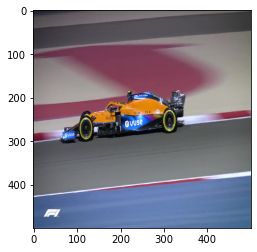

(2, 500, 500, 3)
[1. 0. 0. 0.]


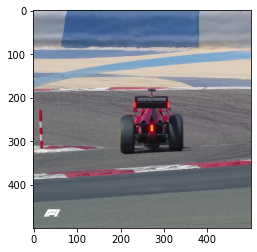

(2, 500, 500, 3)
[0. 0. 1. 0.]


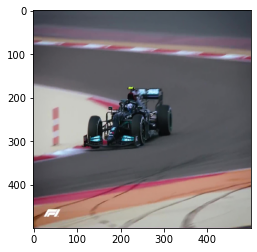

(2, 500, 500, 3)
[0. 0. 0. 1.]


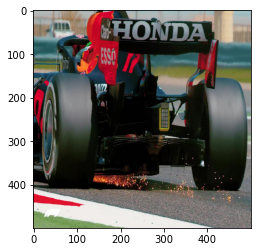

(2, 500, 500, 3)
[0. 1. 0. 0.]


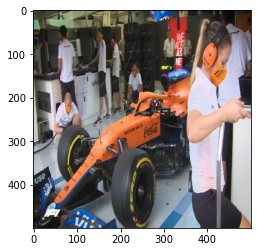

In [3]:
#visualization
for i in range(5):
    img,label = testDatagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

<a id = '4'></a>
## Model Creating and Model Summary

In [4]:
#Sequential Model
model = Sequential([
    layers.Conv2D(4, (3,3), activation = 'elu', input_shape = (500, 500, 3)), 
    layers.MaxPooling2D(2,2),
    layers.Conv2D(8, (3,3), activation = 'elu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16, (3,3), activation = 'elu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation = 'elu'),
    
    #flatten
    layers.Flatten(),
    
    #fc
    layers.Dense(50, activation = 'elu'),
    layers.Dense(100, activation = 'elu'),
    layers.Dense(100, activation = 'elu'),
    layers.Dense(50, activation = 'elu'),
    layers.Dense(4, activation = 'softmax')

])

In [5]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 16)       0

<a id = '5'></a>
## Model Training

In [6]:
#optimizer
optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001)

#loss func
loss = tf.keras.losses.CategoricalCrossentropy()

#model compiling and training
model.compile(optimizer = optimizer, loss = loss, metrics = ['mse', 'accuracy'])
result = model.fit(trainDatagen, epochs = 10, verbose = 1, validation_data = testDatagen)

Epoch 1/10
126/126 [==============================] - 8s 43ms/step - loss: 1.5829 - mse: 0.2020 - accuracy: 0.3254 - val_loss: 1.3027 - val_mse: 0.1939 - val_accuracy: 0.2500
Epoch 2/10
126/126 [==============================] - 5s 42ms/step - loss: 0.7925 - mse: 0.1079 - accuracy: 0.6944 - val_loss: 1.1930 - val_mse: 0.1681 - val_accuracy: 0.4643
Epoch 3/10
126/126 [==============================] - 5s 41ms/step - loss: 0.4208 - mse: 0.0543 - accuracy: 0.8452 - val_loss: 1.2850 - val_mse: 0.1559 - val_accuracy: 0.6429
Epoch 4/10
126/126 [==============================] - 5s 41ms/step - loss: 0.1620 - mse: 0.0181 - accuracy: 0.9524 - val_loss: 1.4705 - val_mse: 0.1831 - val_accuracy: 0.5000
Epoch 5/10
126/126 [==============================] - 5s 42ms/step - loss: 0.0509 - mse: 0.0036 - accuracy: 0.9921 - val_loss: 1.2487 - val_mse: 0.1595 - val_accuracy: 0.5714
Epoch 6/10
126/126 [==============================] - 5s 42ms/step - loss: 0.0137 - mse: 2.0052e-04 - accuracy: 1.0000 - val_

In [23]:
#history of our model
result.history

{'loss': [1.5828840732574463,
  0.792542040348053,
  0.42081668972969055,
  0.1619577556848526,
  0.0509309321641922,
  0.013674001209437847,
  0.008045347407460213,
  0.005488336086273193,
  0.0037607334088534117,
  0.002798199187964201],
 'mse': [0.2020048350095749,
  0.10789766907691956,
  0.0542575940489769,
  0.0181407630443573,
  0.00355306058190763,
  0.00020052377658430487,
  7.746993651380762e-05,
  3.579395342967473e-05,
  1.4671231838292442e-05,
  9.484096153755672e-06],
 'accuracy': [0.3253968358039856,
  0.6944444179534912,
  0.8452380895614624,
  0.9523809552192688,
  0.9920634627342224,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.3026589155197144,
  1.1930103302001953,
  1.285019874572754,
  1.4705098867416382,
  1.2486518621444702,
  1.2839763164520264,
  1.3271141052246094,
  1.3381860256195068,
  1.3826621770858765,
  1.4430502653121948],
 'val_mse': [0.19387374818325043,
  0.16805829107761383,
  0.15594767034053802,
  0.18306170403957367,
  0.1595256030559539

<a id = '6'></a>
## Model Testing

In [24]:
model.evaluate(testDatagen)

14/14 [==============================] - 1s 39ms/step - loss: 1.4431 - mse: 0.1524 - accuracy: 0.6429


[1.4430501461029053, 0.15235409140586853, 0.6428571343421936]

<a id = '7'></a>
### Model Testing on Test Set

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
redbull


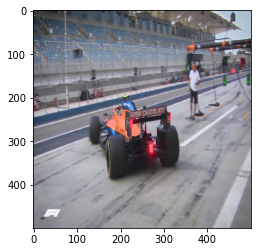

mclaren


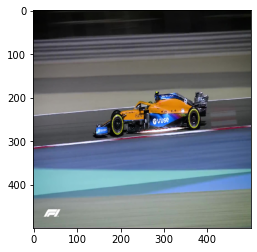

mclaren


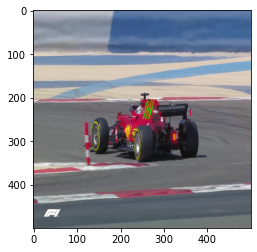

mercedes


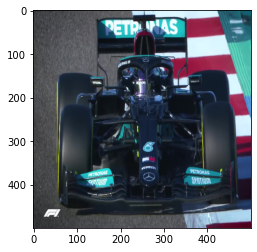

redbull


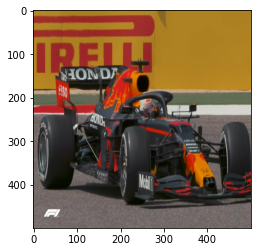

In [25]:
#printing data classes
print(testDatagen.class_indices)

#Model Testing
for i in range(5):
    img,labels = testDatagen.next()
    a = model.predict(img)
    np.argmax(a[0])
    plt.imshow(img[0])
    if np.argmax(a[0]) == 0:
        print('ferrari')
    elif np.argmax(a[0]) == 1:
        print('mclaren')
    elif np.argmax(a[0]) == 2:
        print('mercedes')
    else:
        print('redbull')
    plt.show()

<a id = '8'></a>
### Model Testing on 1 Picture

In [10]:
#Libraries 
from PIL import Image
from skimage import transform

In [11]:
#testing the picture 
image = Image.open('ferrari.jpg')

def testpic(path):
    img = Image.open(path)
    img = np.array(img).astype('float32')/255
    img = transform.resize(img, (500,500,3))
    img = np.expand_dims(img, axis = 0)
    print(testDatagen.class_indices)
    return img

In [12]:
img = testpic('ferrari.jpg')
pred = model.predict(img)
print(pred)
np.argmax(pred)

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[7.4762583e-04 9.1781253e-03 5.2622445e-02 9.3745178e-01]]


3

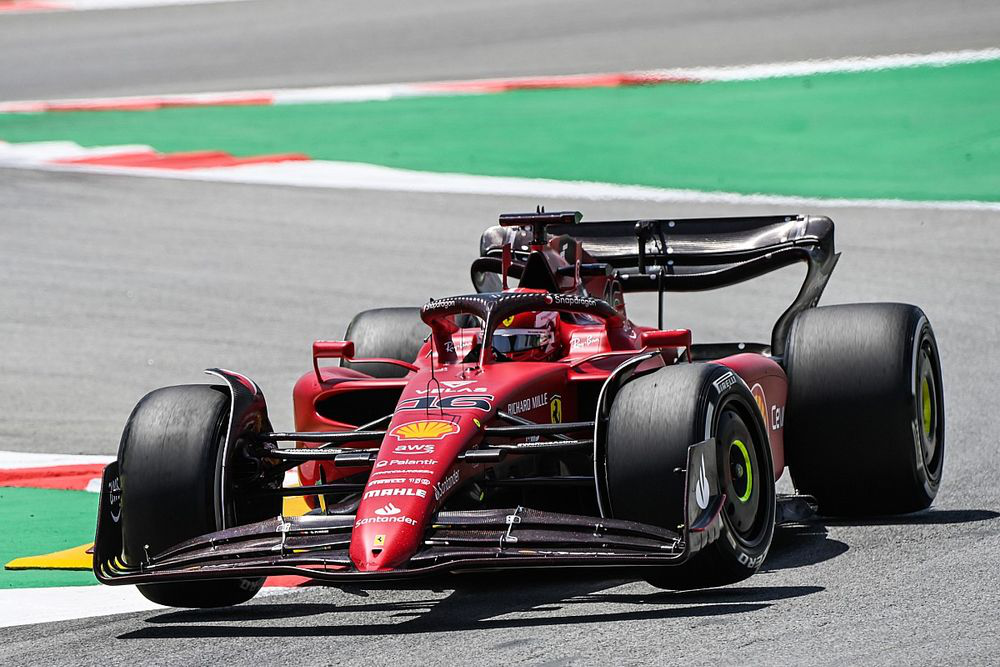

In [13]:
image

<a id = '9'></a>
### Another Model Testing Method

In [14]:
testA = model.predict(testDatagen)

In [15]:
t = []
print(testDatagen.class_indices)
for i in testA: 
    t.append(np.argmax(i))

x = zip(t, testDatagen.labels)
for i,j in x:
    print('Prediction:{}  Real:{}'.format(i,j))

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
Prediction:1  Real:0
Prediction:2  Real:0
Prediction:0  Real:0
Prediction:3  Real:0
Prediction:1  Real:0
Prediction:3  Real:0
Prediction:1  Real:0
Prediction:0  Real:1
Prediction:2  Real:1
Prediction:1  Real:1
Prediction:3  Real:1
Prediction:1  Real:1
Prediction:3  Real:1
Prediction:1  Real:1
Prediction:3  Real:2
Prediction:2  Real:2
Prediction:2  Real:2
Prediction:2  Real:2
Prediction:1  Real:2
Prediction:0  Real:2
Prediction:3  Real:2
Prediction:0  Real:3
Prediction:1  Real:3
Prediction:3  Real:3
Prediction:2  Real:3
Prediction:2  Real:3
Prediction:3  Real:3
Prediction:3  Real:3


<a id = '10'></a> 
## Model Saving and Loading

In [16]:
#Model saving
model.save('save_model/')

INFO:tensorflow:Assets written to: save_model/assets


In [17]:
#Model saving h5
model.save('save_model/video.h5')

In [18]:
#Saving weights
model.save_weights('save_model_weights/')

In [19]:
#Saving weights h5
model.save_weights('save_model_weights/video.h5')

In [20]:
#Model loading
model.load_weights('save_model_weights/video.h5')
model.evaluate(testDatagen)

14/14 [==============================] - 1s 38ms/step - loss: 1.4431 - mse: 0.1524 - accuracy: 0.6429


[1.443050503730774, 0.15235410630702972, 0.6428571343421936]

<a id = '11'></a>
## Model Visualization

In [27]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
acc_loss = result.history['loss']
val_loss = result.history['val_loss']
epoch = range(1, len(acc)+1)

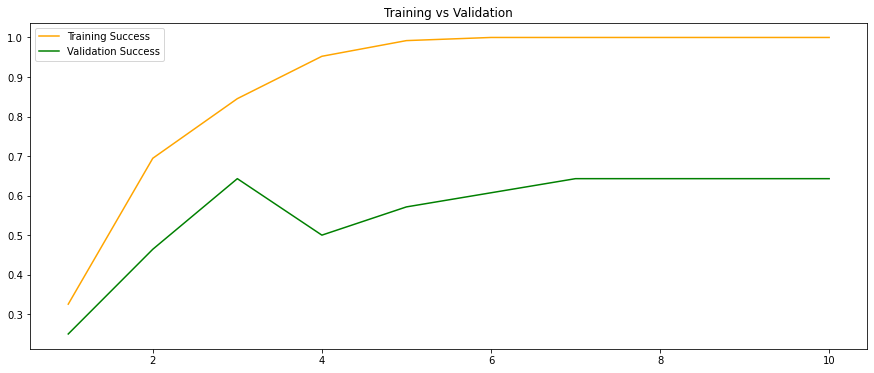

In [35]:
#training vs validation
plt.figure(figsize = (15,6))
plt.plot(epoch, acc, label = ('Training accuracy'), color = 'orange')
plt.plot(epoch, val_acc, label = ('Validation accuracy'), color = 'g')
plt.title('Training vs Validation')
plt.legend()
plt.show()

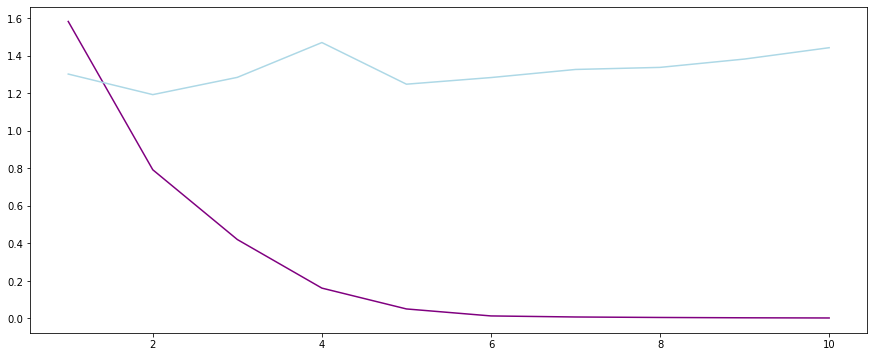

In [38]:
#training loss vs validation loss
plt.figure(figsize = (15,6))
plt.plot(epoch, acc_loss, label = ('Training Loss'), color = 'purple')
plt.plot(epoch, val_loss, label = ('Validation Loss'), color = 'lightblue')

<a id = '12'></a>
## Visualizing Hidden Layers

In [39]:
from skimage import transform 
np_img = Image.open('ferrari.jpg')
np_img = np.array(np_img).astype('float32')/255
np_img = transform.resize(np_img, (500,500,3))
image = np.expand_dims(np_img, axis = 0)

In [66]:
layers = [layer.output for layer in model.layers[:8]]
katman = tf.keras.models.Model(inputs = model.input, outputs = layers)
katman = katman.predict(image)
first = katman[6]
print(first.shape)

(1, 58, 58, 32)


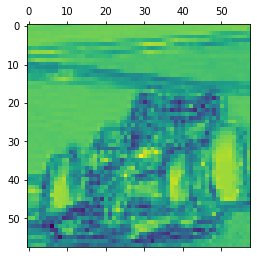

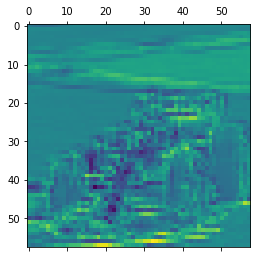

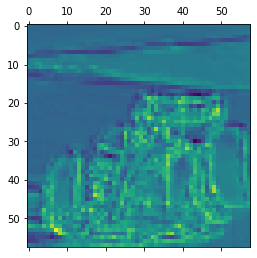

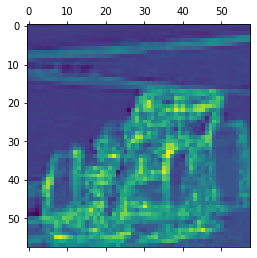

In [72]:
plt.matshow(first[0,:,:,0], cmap = 'viridis')
plt.matshow(first[0,:,:,1], cmap = 'viridis')
plt.matshow(first[0,:,:,2], cmap = 'viridis')
plt.matshow(first[0,:,:,3], cmap = 'viridis')
plt.show()